<a href="https://colab.research.google.com/github/ArthurDP-03/Analise_enem_2023/blob/main/An%C3%A1lise_Explorat%C3%B3ria_ENEM_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Dados Enem 2023**

**Autor**: Arthur de Oliveira <a href="https://www.linkedin.com/in/arthurdatadriven" target="_blank">Linkedln</a>

**Data de produção**: 30/08/2024

---

##**Objetivos**:
Entender como os alunos que concluiram o Enem de 2023 performaram de acordo com a cor de pele e sexo. E se de acordo com essas variáveis temos como prever sua nota.

Para isso iremos responder algumas perguntas:


1- Quantos alunos fizeram o enem?

2- Qual a porcentagem de alunos por cor?

3- Qual a porcentagem de alunos por escolaridade?

4- Qual o DESVIO PADRÃO e MÉDIA da nota_geral por cor?

5- Qual o DESVIO PADRÃO e MÉDIA da nota_geral por sexo?

6- Qual o DESVIO PADRÃO e MÉDIA de cada matéria por cor?

7- Qual o DESVIO PADRÃO e MÉDIA de cada matéria por sexo?






8- Através dos dados criar um modelo de previsão de nota de cada matéria por cor e sexo. Para saber se dá pra prever quanto um aluno iria tirar de nota dependendo da sua cor e raça.

##**Dados a serem usados:**
**Material**: Microdados do [Enem 2023](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem) (Arquivos atualizados em 24/07/2024 após ajustes no dicionário de dados e na base de itens)

O dicionário estará disponível detalhadamente no drive.

---

### **Características:**
NU_INSCRICAO: numero de inscrição

NU_ANO: Ano do enem

TP_SEXO: sexo por código

TP_COR_RACA: raça por código

---



### **Status de presença:**

TP_PRESENCA_CN: Ciências da Natureza

TP_PRESENCA_CH: Ciências Humanas

TP_PRESENCA_LC: Linguagem e códigos

TP_PRESENCA_MT: Matemática

TP_STATUS_REDACAO: Redação

---


### **Notas:**

NU_NOTA_CN: Ciências da Natureza

NU_NOTA_CH: Ciências Humanas

NU_NOTA_LC: Linguagem e códigos

NU_NOTA_MT: Matemática

NU_NOTA_REDACAO: Redação

##**Biblioteca de Auxílio:**



*   Numpy: biblioteca de computação científica
*   Pandas: biblioteca de manipulação de dados
*   Seaborn: biblioteca de visualização de dados
*   Matplotlib: biblioteca mais complexa que da origem ao seaborn
*   Warnings: remove os warning de execução (para não poluir os estudos)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


---

In [ ]:
!pip install -U scikit-learn

##**Download e Leitura dos Dados:**





- Baixar arquivo csv do enem

In [ ]:
!pip install gdown

import gdown

#  ID do arquivo
dados_id = "1PoX5v5JrFcrurnTjnexKHdnhw4zu8LT5"
dicionario_id = '14oBF_7c87698Sa56COolpfEcMHkH8hDz'

# Nome do arquivo local que será salvo
output = "MICRODADOS_ENEM_2023.csv"
output2 = "Dicionário_Microdados_Enem_2023.xlsx"
# Fazer o download
gdown.download(f"https://drive.google.com/uc?id={dados_id}", output, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={dicionario_id}", output2, quiet=False)



Downloading...
From (original): https://drive.google.com/uc?id=1PoX5v5JrFcrurnTjnexKHdnhw4zu8LT5
From (redirected): https://drive.google.com/uc?id=1PoX5v5JrFcrurnTjnexKHdnhw4zu8LT5&confirm=t&uuid=17a50b36-1c3e-4ea3-95ab-653e5f078349
To: /content/MICRODADOS_ENEM_2023.csv
100%|██████████| 1.78G/1.78G [00:39<00:00, 44.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=14oBF_7c87698Sa56COolpfEcMHkH8hDz
To: /content/Dicionário_Microdados_Enem_2023.xlsx
100%|██████████| 20.6k/20.6k [00:00<00:00, 22.2MB/s]


'Dicionário_Microdados_Enem_2023.xlsx'

- Ler arquivo csv do enem

In [ ]:
dados_enem = pd.read_csv("MICRODADOS_ENEM_2023.csv", sep=';', encoding='latin-1')
dados_enem

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,210061959676,2023,12,M,1,1,1,1,6,1,...,B,A,A,C,A,B,E,A,A,B
3933951,210061950911,2023,1,F,1,1,2,3,0,1,...,B,A,B,C,B,B,B,B,C,B
3933952,210061965966,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,B
3933953,210061932304,2023,2,M,1,1,1,2,0,3,...,B,B,B,C,A,A,D,A,C,B


In [ ]:
dados_enem.shape


(3933955, 76)

In [ ]:
dados_enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

## **Limpeza dos dados**:

In [ ]:
dados_enem_novo = dados_enem[['TP_SEXO', 'TP_COR_RACA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO']]
dados_enem_novo


,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,M,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,M,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,F,1,1,1,1,1,502.0,498.9,475.6,363.2,1.0,700.0
3,F,3,1,1,1,1,459.0,508.5,507.2,466.7,1.0,880.0
4,F,3,1,1,1,1,402.5,379.2,446.9,338.3,1.0,560.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3933950,M,1,1,1,1,1,566.2,605.6,613.7,547.3,1.0,540.0
3933951,F,1,1,1,1,1,377.2,535.6,610.6,644.4,1.0,640.0
3933952,F,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3933953,M,1,1,1,1,1,515.7,539.0,536.0,569.0,1.0,600.0


- Removendo as pessoas que não realizaram todas as provas e anularam a redação
- Resetando o índice após a remoção
- Exibindo o resultado

In [ ]:
dados_enem_novo = dados_enem_novo[dados_enem_novo[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']].eq(1).all(axis=1)]
dados_enem_novo = dados_enem_novo.dropna(subset=['TP_STATUS_REDACAO'])

dados_enem_novo = dados_enem_novo.reset_index(drop=True)

dados_enem_novo


,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,F,1,1,1,1,1,502.0,498.9,475.6,363.2,1.0,700.0
1,F,3,1,1,1,1,459.0,508.5,507.2,466.7,1.0,880.0
2,F,3,1,1,1,1,402.5,379.2,446.9,338.3,1.0,560.0
3,M,1,1,1,1,1,564.7,630.3,610.4,680.2,1.0,600.0
4,M,3,1,1,1,1,644.9,620.2,626.9,736.3,1.0,860.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2678259,F,1,1,1,1,1,568.6,605.2,598.2,496.8,1.0,500.0
2678260,M,1,1,1,1,1,476.2,542.9,545.2,530.5,1.0,600.0
2678261,M,1,1,1,1,1,566.2,605.6,613.7,547.3,1.0,540.0
2678262,F,1,1,1,1,1,377.2,535.6,610.6,644.4,1.0,640.0


- Tirando os zeros e resetando os índices

In [ ]:
dados_enem_novo = dados_enem_novo.dropna().reset_index(drop=True)
dados_enem_novo

,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,F,1,1,1,1,1,502.0,498.9,475.6,363.2,1.0,700.0
1,F,3,1,1,1,1,459.0,508.5,507.2,466.7,1.0,880.0
2,F,3,1,1,1,1,402.5,379.2,446.9,338.3,1.0,560.0
3,M,1,1,1,1,1,564.7,630.3,610.4,680.2,1.0,600.0
4,M,3,1,1,1,1,644.9,620.2,626.9,736.3,1.0,860.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2678259,F,1,1,1,1,1,568.6,605.2,598.2,496.8,1.0,500.0
2678260,M,1,1,1,1,1,476.2,542.9,545.2,530.5,1.0,600.0
2678261,M,1,1,1,1,1,566.2,605.6,613.7,547.3,1.0,540.0
2678262,F,1,1,1,1,1,377.2,535.6,610.6,644.4,1.0,640.0


## **Respostas**

####1- Quantos alunos fizeram o enem? ->



In [ ]:
#1

dados_enem_novo.shape

(2678264, 12)

####2- Porcentagens de alunos por cor ->



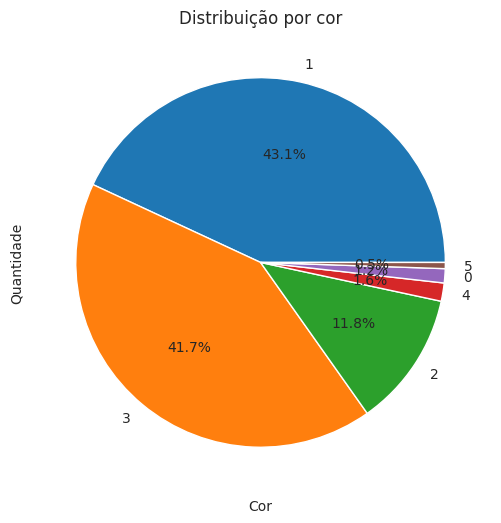

In [ ]:
#2
dados_cor = dados_enem_novo.query['TP_COR_RACA != 0']
plt.figure(figsize=(10, 6))
with sns.axes_style('whitegrid'):
  plt.pie(dados_cor.value_counts(), labels=dados_cor.value_counts().index, autopct='%1.1f%%')
  plt.title('Distribuição por cor')
  plt.ylabel('Quantidade')
  plt.xlabel('Cor')


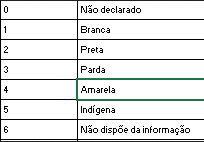

####3- Porcentagem de alunos por sexo ->



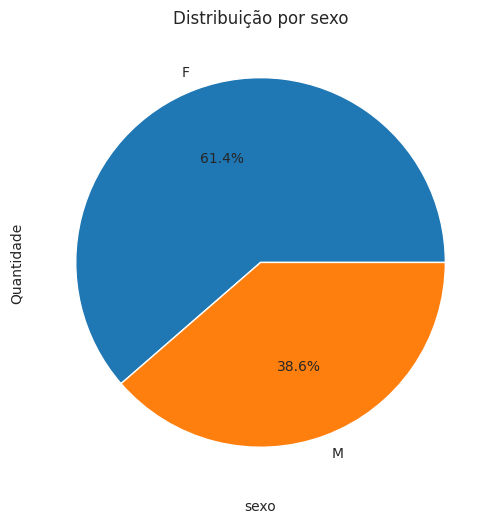

In [ ]:
#3
dados_sexo = dados_enem_novo['TP_SEXO']
plt.figure(figsize=(10, 6))
with sns.axes_style('whitegrid'):
  plt.pie(dados_sexo.value_counts(), labels=dados_sexo.value_counts().index, autopct='%1.1f%%')
  plt.title('Distribuição por sexo')
  plt.ylabel('Quantidade')
  plt.xlabel('sexo')


####4- DESVIO PADRÃO e MÉDIA da nota_geral por cor ->


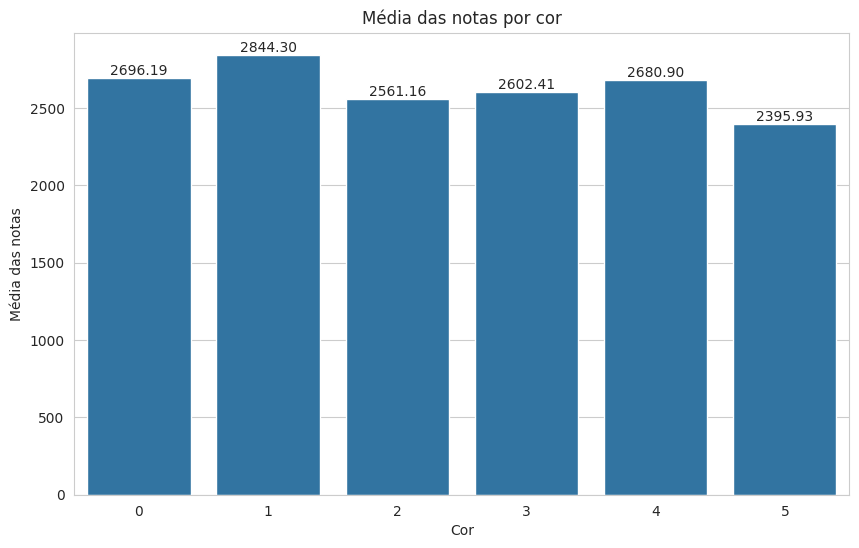

In [ ]:
#4.1
notas = dados_enem_novo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
soma_notas= notas.sum(axis=1)

dados_enem_novo['soma_notas'] = soma_notas
dados_cor_mean= dados_enem_novo[['TP_COR_RACA', 'soma_notas']]
#media por cor
dados_cor_mean = dados_cor_mean.groupby('TP_COR_RACA').mean()
dados_cor_mean = dados_cor_mean.reset_index()

dados_cor_mean
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='TP_COR_RACA', y='soma_notas', data=dados_cor_mean)
  plt.title('Média das notas por cor')
  plt.xlabel('Cor')
  plt.ylabel('Média das notas')
  for i, v in enumerate(dados_cor_mean['soma_notas']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')



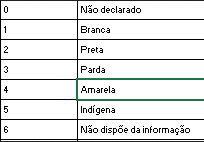

In [ ]:
 #4.2 use o desvio padrão para um grafico boxplot para cada cor
dados_cor_std = dados_enem_novo.groupby("TP_COR_RACA")["soma_notas"].std()
dados_cor_std = dados_cor_std.reset_index()
dados_cor_std

,TP_COR_RACA,soma_notas
0,0,512.129858
1,1,468.583719
2,2,430.863619
3,3,454.676383
4,4,507.048324
5,5,427.865374


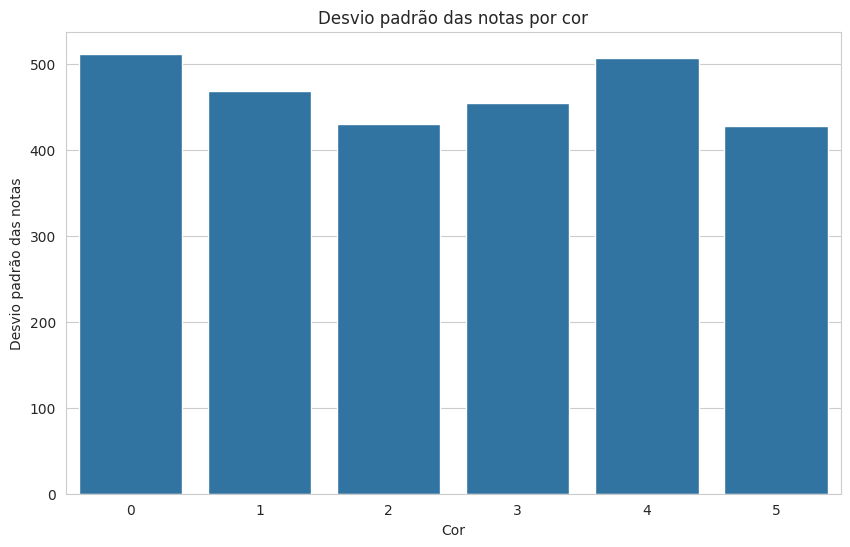

In [ ]:
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(
    x="TP_COR_RACA",
    y="soma_notas",
    data=dados_cor_std
)
  plt.title('Desvio padrão das notas por cor')
  plt.xlabel('Cor')
  plt.ylabel('Desvio padrão das notas')



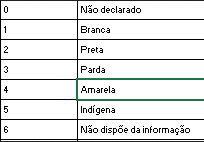

####5- DESVIO PADRÃO e MÉDIA da nota_geral por sexo ->


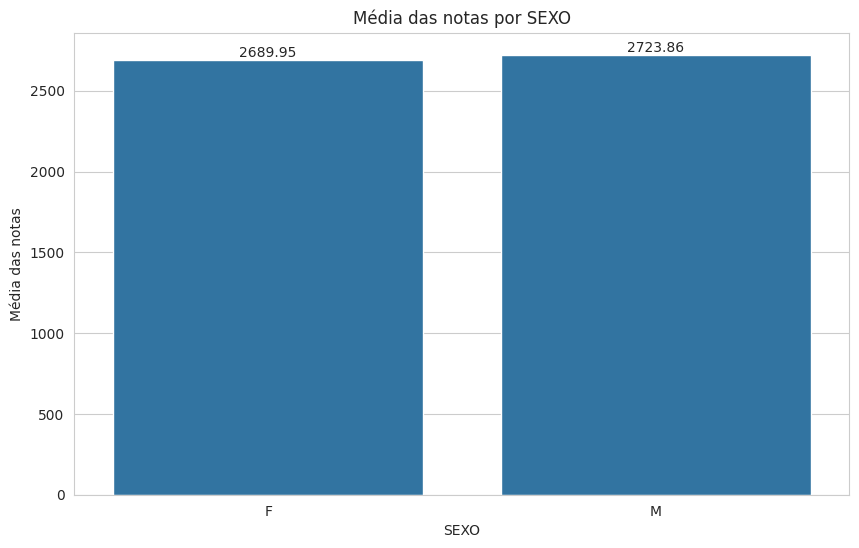

In [ ]:
#5.1
notas = dados_enem_novo[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
soma_notas= notas.sum(axis=1)

dados_enem_novo['soma_notas'] = soma_notas
dados_sexo_mean= dados_enem_novo[['TP_SEXO', 'soma_notas']]
#media por cor
dados_sexo_mean = dados_sexo_mean.groupby('TP_SEXO').mean()
dados_sexo_mean = dados_sexo_mean.reset_index()

dados_sexo_mean
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(x='TP_SEXO', y='soma_notas', data=dados_sexo_mean)
  plt.title('Média das notas por SEXO')
  plt.xlabel('SEXO')
  plt.ylabel('Média das notas')
  for i, v in enumerate(dados_sexo_mean['soma_notas']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')


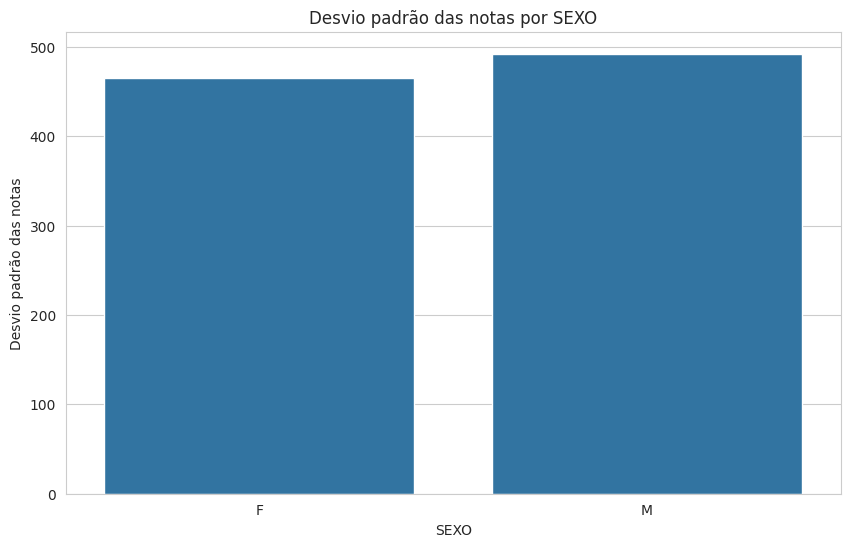

In [ ]:
#5.2
dados_cor_std = dados_enem_novo.groupby("TP_SEXO")["soma_notas"].std()
dados_cor_std = dados_cor_std.reset_index()
dados_cor_std
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.barplot(
    x="TP_SEXO",
    y="soma_notas",
    data=dados_cor_std
)
  plt.title('Desvio padrão das notas por SEXO')
  plt.xlabel('SEXO')
  plt.ylabel('Desvio padrão das notas')


- Aprofundando os dados de sexo

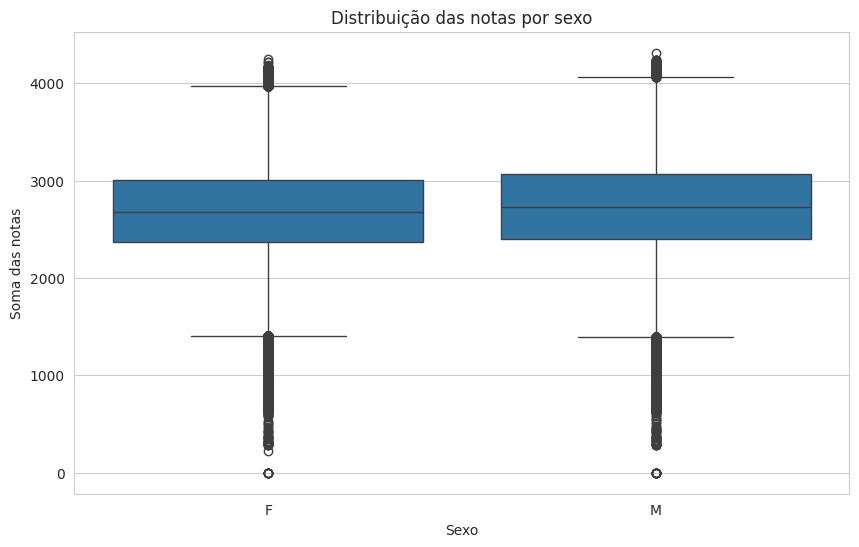

In [ ]:
# Faça um gráfico boxplot com dados do sexo masculino e feminino
dados_enem_sexo = dados_enem_novo[['TP_SEXO', 'soma_notas']]
dados_enem_sexo_masculino = dados_enem_sexo[dados_enem_sexo['TP_SEXO'] == 0]
dados_enem_sexo_feminino = dados_enem_sexo[dados_enem_sexo['TP_SEXO'] == 1]

with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='TP_SEXO', y='soma_notas', data=dados_enem_sexo)
  plt.title('Distribuição das notas por sexo')
  plt.xlabel('Sexo')
  plt.ylabel('Soma das notas')


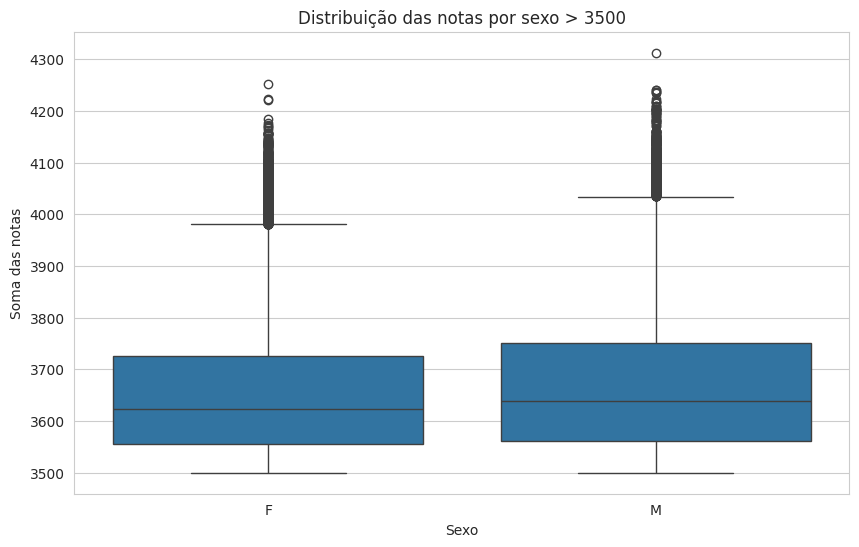

In [ ]:
#pegue apenas alunos que tiveram a media acima de 3500 soma_notas
dados_sexo_3500 = dados_enem_novo[dados_enem_novo['soma_notas'] >= 3500]
dados_sexo_3500
with sns.axes_style('whitegrid'):
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='TP_SEXO', y='soma_notas', data=dados_sexo_3500)
  plt.title('Distribuição das notas por sexo > 3500')
  plt.xlabel('Sexo')
  plt.ylabel('Soma das notas')


In [ ]:
dados_sexo_3500_masculino = dados_enem_novo[(dados_enem_novo['TP_SEXO'] == 'M') & (dados_enem_novo['soma_notas'] >= 3500)]
dados_sexo_3500_feminino = dados_enem_novo[(dados_enem_novo['TP_SEXO'] == 'F') & (dados_enem_novo['soma_notas'] >= 3500)]
dados_sexo_3500_masculino

,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,soma_notas
60,M,2,1,1,1,1,643.2,601.9,629.3,756.1,1.0,960.0,3590.5
63,M,3,1,1,1,1,680.2,670.1,684.4,706.5,1.0,980.0,3721.2
70,M,3,1,1,1,1,645.0,652.4,612.8,742.1,1.0,940.0,3592.3
78,M,1,1,1,1,1,645.8,681.2,575.1,786.7,1.0,900.0,3588.8
143,M,1,1,1,1,1,678.6,666.1,647.1,831.8,1.0,800.0,3623.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678100,M,2,1,1,1,1,651.7,658.8,608.1,689.7,1.0,900.0,3508.3
2678125,M,1,1,1,1,1,614.6,619.9,622.1,851.2,1.0,840.0,3547.8
2678177,M,1,1,1,1,1,645.3,702.0,675.1,822.4,1.0,660.0,3504.8
2678192,M,1,1,1,1,1,620.1,625.3,605.7,733.9,1.0,920.0,3505.0


In [ ]:
dados_sexo_3500_feminino

,TP_SEXO,TP_COR_RACA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,soma_notas
13,F,1,1,1,1,1,707.0,667.6,628.1,816.8,1.0,820.0,3639.5
21,F,3,1,1,1,1,592.9,624.0,676.4,731.8,1.0,880.0,3505.1
23,F,1,1,1,1,1,632.0,688.4,635.8,709.6,1.0,940.0,3605.8
86,F,3,1,1,1,1,714.4,742.4,711.7,760.4,1.0,960.0,3888.9
163,F,1,1,1,1,1,660.3,658.6,631.4,766.1,1.0,940.0,3656.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677421,F,1,1,1,1,1,636.2,661.5,629.2,714.2,1.0,860.0,3501.1
2678110,F,3,1,1,1,1,552.4,656.1,672.8,702.7,1.0,920.0,3504.0
2678166,F,1,1,1,1,1,656.1,679.9,667.7,735.7,1.0,820.0,3559.4
2678176,F,1,1,1,1,1,654.0,740.8,677.1,749.3,1.0,960.0,3781.2


In [ ]:
dados_sexo_3500_masculino.shape[0]/(dados_sexo_3500_masculino.shape[0] + dados_sexo_3500_feminino.shape[0])

0.4438759046697091


####6- DESVIO PADRÃO e MÉDIA de cada matéria por cor ->


<ipython-input-23-b074d7e8e793>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TP_COR_RACA'] = df['TP_COR_RACA'].map(mapa_cor_raca)
<ipython-input-23-b074d7e8e793>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=colunas_renomeadas, inplace=True)


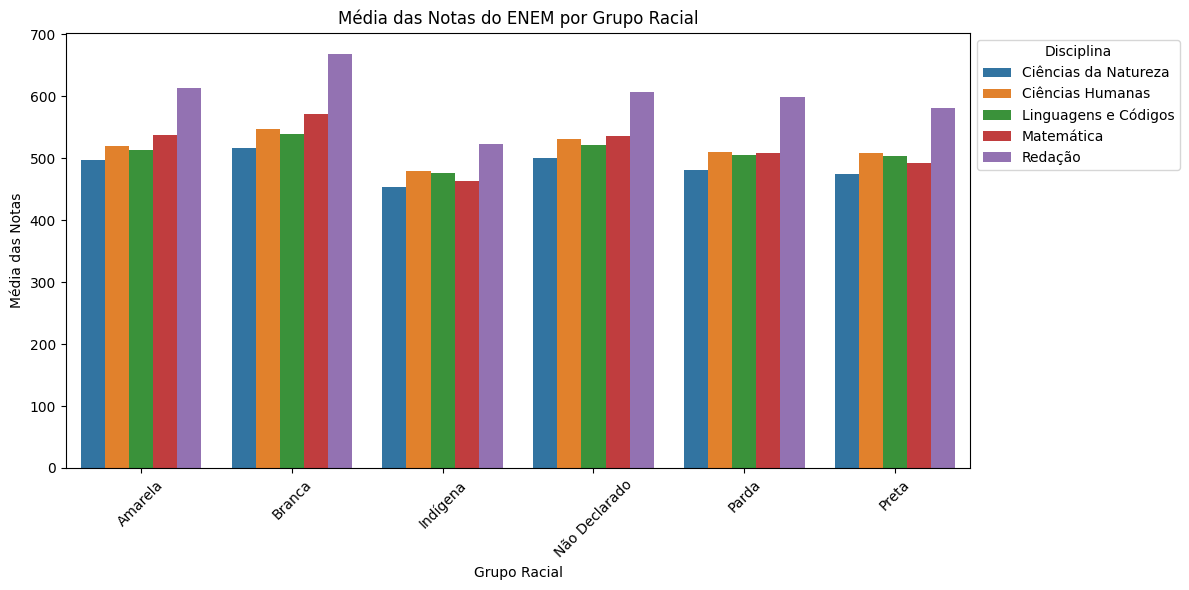

In [ ]:
#6.1
df = dados_enem_novo[['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
mapa_cor_raca = {0: 'Não Declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não Informado'}
colunas_renomeadas = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}

# Transformações
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(mapa_cor_raca)
df.rename(columns=colunas_renomeadas, inplace=True)
df_medias = df.groupby('TP_COR_RACA')[list(colunas_renomeadas.values())].mean().reset_index()
df_melted = df_medias.melt(id_vars='TP_COR_RACA', var_name='Disciplina', value_name='Média da Nota')

# Plotagem
plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted, x='TP_COR_RACA', y='Média da Nota', hue='Disciplina')
plt.xlabel('Grupo Racial')
plt.ylabel('Média das Notas')
plt.title('Média das Notas do ENEM por Grupo Racial')
plt.xticks(rotation=45)
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()




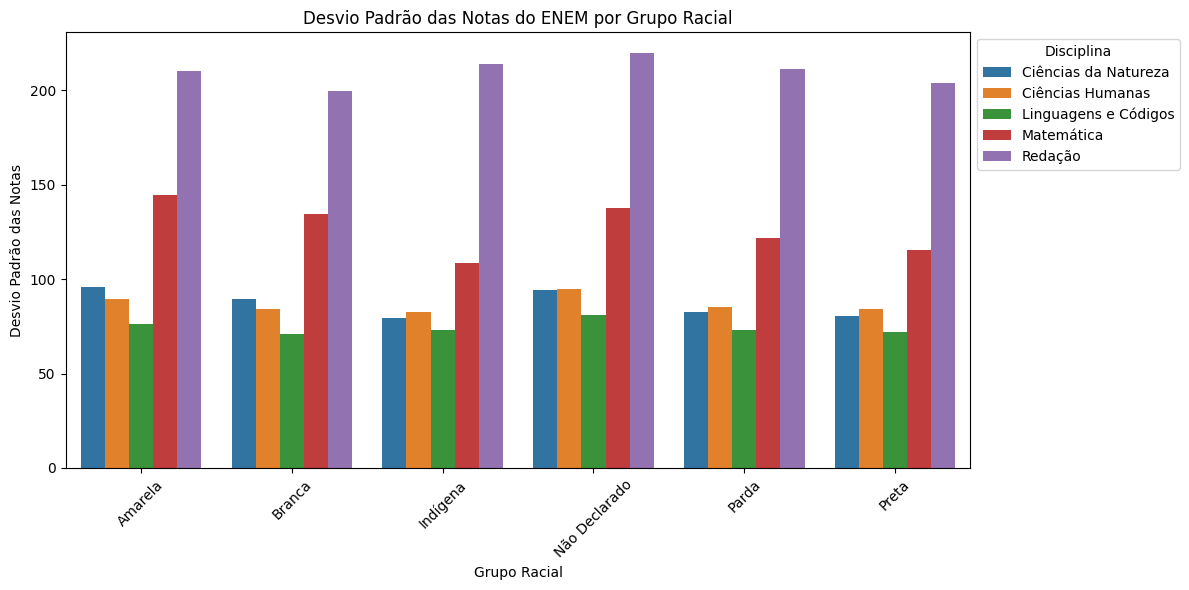

In [ ]:
#6.2 Desvio padrão
df_std = df.groupby('TP_COR_RACA')[list(colunas_renomeadas.values())].std().reset_index()
df_melted_std = df_std.melt(id_vars='TP_COR_RACA', var_name='Disciplina', value_name='Desvio Padrão')

plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted_std, x='TP_COR_RACA', y='Desvio Padrão', hue='Disciplina')
plt.xlabel('Grupo Racial')
plt.ylabel('Desvio Padrão das Notas')
plt.title('Desvio Padrão das Notas do ENEM por Grupo Racial')
plt.xticks(rotation=45)
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


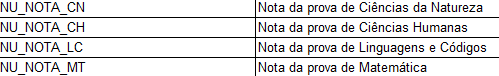


####7- DESVIO PADRÃO e MÉDIA de cada matéria por sexo ->

<ipython-input-25-af3e5db28b95>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_por_sexo.rename(columns=colunas_renomeadas, inplace=True)


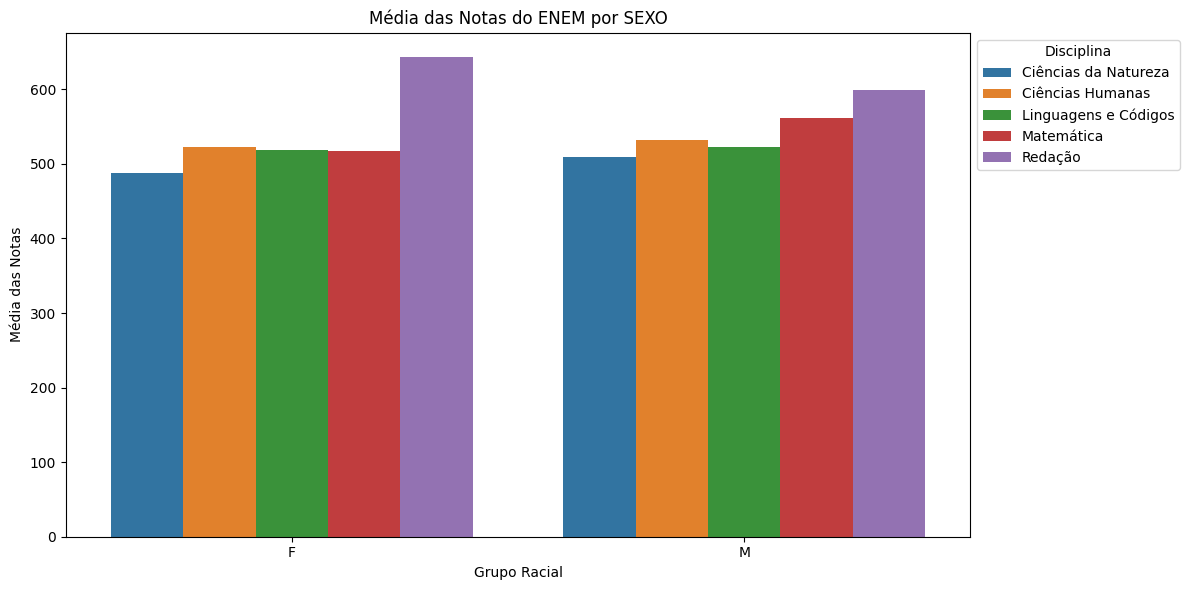

In [ ]:
#7.1 MÉDIA de cada matéria por sexo
df_por_sexo = dados_enem_novo[['TP_SEXO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
dados_medias_por_sexo = df_por_sexo.reset_index()

colunas_renomeadas = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}
df_por_sexo.rename(columns=colunas_renomeadas, inplace=True)
df_medias = df_por_sexo.groupby('TP_SEXO')[list(colunas_renomeadas.values())].mean().reset_index()
df_melted = df_medias.melt(id_vars='TP_SEXO', var_name='Disciplina', value_name='Média da Nota')

plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted, x='TP_SEXO', y='Média da Nota', hue='Disciplina')
plt.xlabel('Grupo Racial')
plt.ylabel('Média das Notas')
plt.title('Média das Notas do ENEM por SEXO')
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

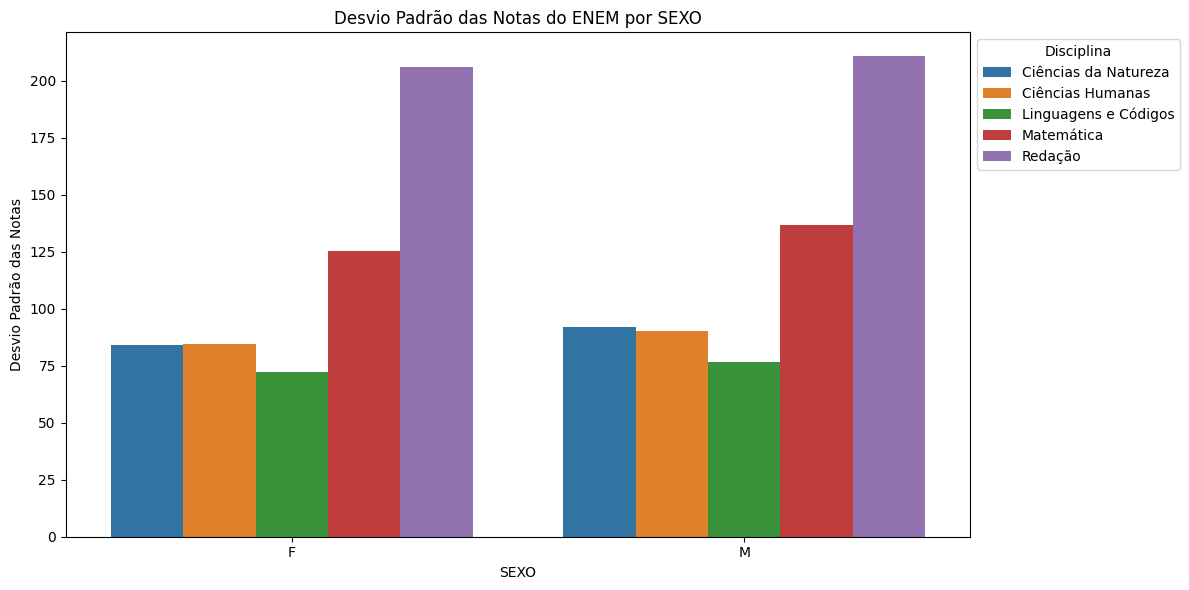

In [ ]:
#7.2
df_std = df_por_sexo.groupby('TP_SEXO')[list(colunas_renomeadas.values())].std().reset_index()
df_melted_std = df_std.melt(id_vars='TP_SEXO', var_name='Disciplina', value_name='Desvio Padrão')

plt.figure(figsize=(12, 6))
g = sns.barplot(data=df_melted_std, x='TP_SEXO', y='Desvio Padrão', hue='Disciplina')
plt.xlabel('SEXO')
plt.ylabel('Desvio Padrão das Notas')
plt.title('Desvio Padrão das Notas do ENEM por SEXO')
plt.legend(title='Disciplina', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### **Previsão das Notas**

#### **Mudando nome das colunas**

In [ ]:
#Colunas a serem usadas
coluna_pedritora = ['Cor/Raça', 'Sexo']
colunas_alvo = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

In [ ]:
print(dados_enem_novo.columns)

Index(['TP_SEXO', 'TP_COR_RACA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO',
       'soma_notas'],
      dtype='object')


In [ ]:
dados_enem_novo = dados_enem_novo.rename(columns={
    'TP_COR_RACA': 'Cor/Raça',
    'TP_SEXO': 'Sexo',
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
})

In [ ]:
dados_enem_pr = dados_enem_novo[coluna_pedritora + colunas_alvo]


#### **One Hot Encoding**

In [ ]:

dados_enem_pr['Cor/Raça n/declarada'] = (dados_enem_pr['Cor/Raça'] == 0).astype(int)
dados_enem_pr['Cor/Raça Branca'] = (dados_enem_pr['Cor/Raça'] == 1).astype(int)
dados_enem_pr['Cor/Raça Preta'] = (dados_enem_pr['Cor/Raça'] == 2).astype(int)
dados_enem_pr['Cor/Raça Parda'] = (dados_enem_pr['Cor/Raça'] == 3).astype(int)
dados_enem_pr['Cor/Raça Amarela'] = (dados_enem_pr['Cor/Raça'] == 4).astype(int)
dados_enem_pr['Cor/Raça Indígena'] = (dados_enem_pr['Cor/Raça'] == 5).astype(int)
dados_enem_pr['Cor/Raça Não Informado'] = (dados_enem_pr['Cor/Raça'] == 6).astype(int)

dados_enem_pr['Masculino'] = (dados_enem_pr['Sexo'] == 'M').astype(int)
dados_enem_pr['Feminino'] = (dados_enem_pr['Sexo'] == 'F').astype(int)

dados_enem_pr_final = dados_enem_pr.drop(columns=['Cor/Raça', 'Sexo'])
dados_enem_pr_final

<ipython-input-31-4d1f300602fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_enem_pr['Cor/Raça n/declarada'] = (dados_enem_pr['Cor/Raça'] == 0).astype(int)
<ipython-input-31-4d1f300602fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_enem_pr['Cor/Raça Branca'] = (dados_enem_pr['Cor/Raça'] == 1).astype(int)
<ipython-input-31-4d1f300602fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Cor/Raça n/declarada,Cor/Raça Branca,Cor/Raça Preta,Cor/Raça Parda,Cor/Raça Amarela,Cor/Raça Indígena,Cor/Raça Não Informado,Masculino,Feminino
0,502.0,498.9,475.6,363.2,700.0,0,1,0,0,0,0,0,0,1
1,459.0,508.5,507.2,466.7,880.0,0,0,0,1,0,0,0,0,1
2,402.5,379.2,446.9,338.3,560.0,0,0,0,1,0,0,0,0,1
3,564.7,630.3,610.4,680.2,600.0,0,1,0,0,0,0,0,1,0
4,644.9,620.2,626.9,736.3,860.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678259,568.6,605.2,598.2,496.8,500.0,0,1,0,0,0,0,0,0,1
2678260,476.2,542.9,545.2,530.5,600.0,0,1,0,0,0,0,0,1,0
2678261,566.2,605.6,613.7,547.3,540.0,0,1,0,0,0,0,0,1,0
2678262,377.2,535.6,610.6,644.4,640.0,0,1,0,0,0,0,0,0,1


In [ ]:
dados_enem_pr_final.columns

Index(['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos',
       'Matemática', 'Redação', 'Cor/Raça n/declarada', 'Cor/Raça Branca',
       'Cor/Raça Preta', 'Cor/Raça Parda', 'Cor/Raça Amarela',
       'Cor/Raça Indígena', 'Cor/Raça Não Informado', 'Masculino', 'Feminino'],
      dtype='object')

#### **Achando outliers**

- testando se há muitos outliers

In [ ]:
data = dados_enem_pr[colunas_alvo]
data_query = data.query('`Redação` < 200 & `Matemática` < 200 & `Linguagens e Códigos` < 200 & `Ciências Humanas` < 200 & `Ciências da Natureza` < 200')
data_query.shape



(20, 5)

- Analizando outliers


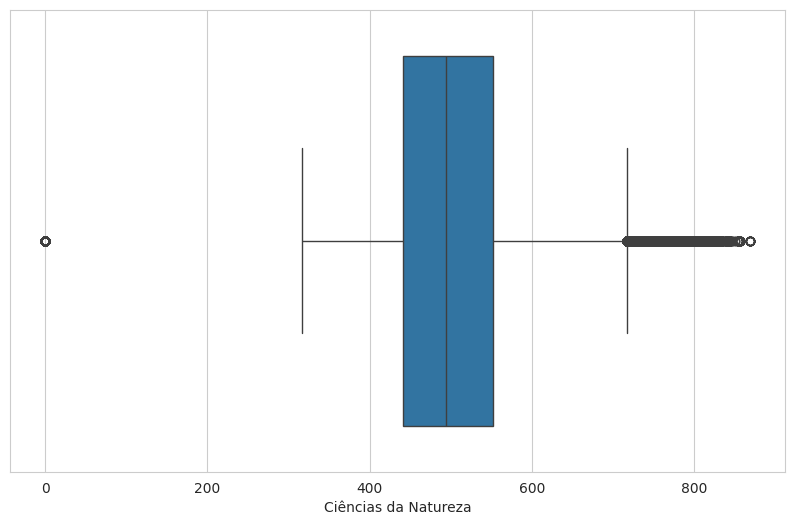

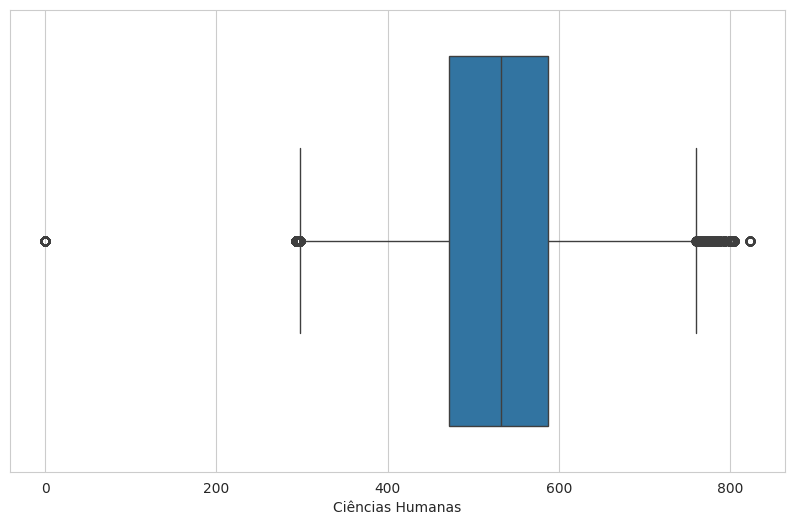

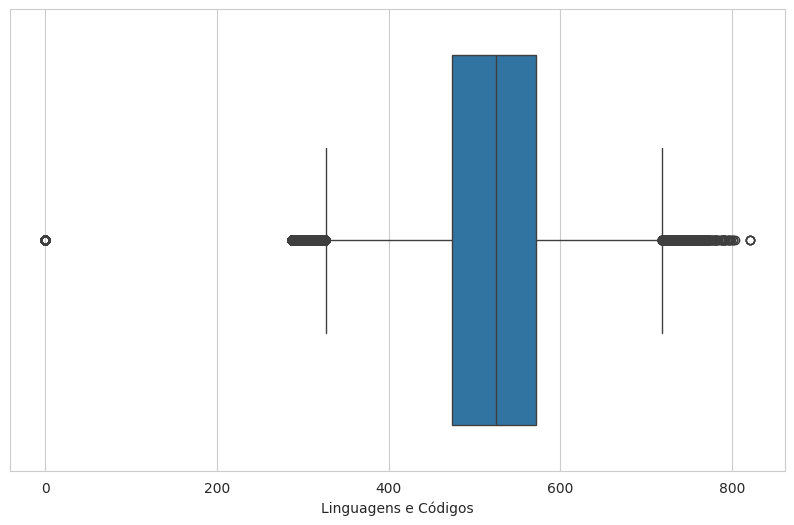

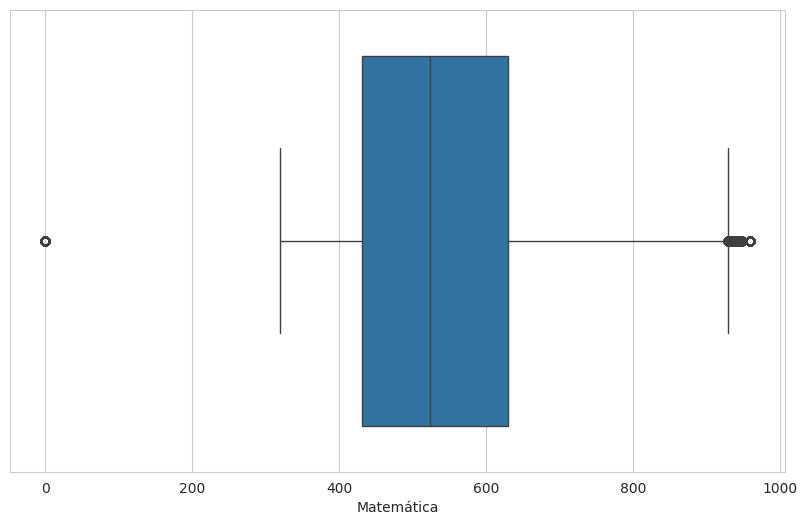

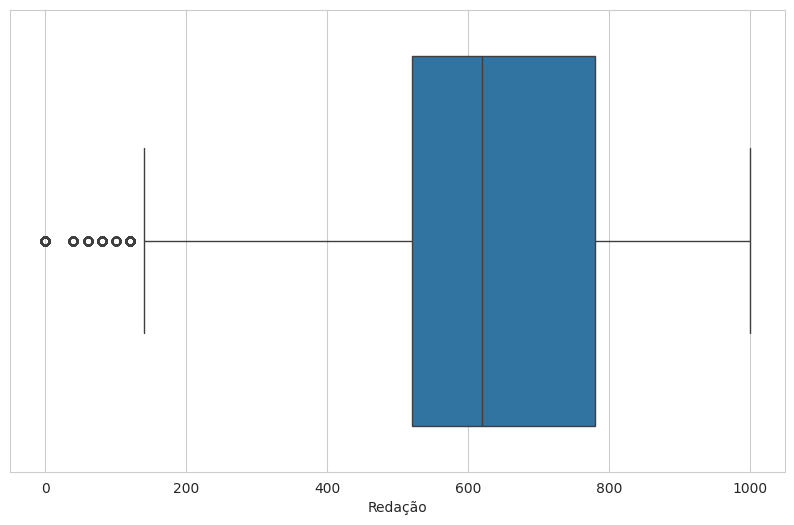

In [ ]:
for materia in colunas_alvo:
  with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=materia,data=dados_enem_pr_final)

#### **Separando Dados**

In [ ]:
preditor = dados_enem_pr_final[['Masculino', 'Feminino', 'Cor/Raça Branca', 'Cor/Raça Preta', 'Cor/Raça Parda', 'Cor/Raça Amarela', 'Cor/Raça Indígena']]
materias = dados_enem_pr_final[['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']]


#### **Padronização dos dados**

In [ ]:
scaler = StandardScaler()
materias_scaled = scaler.fit_transform(materias)


In [ ]:
materias_scaled = pd.DataFrame(materias_scaled, columns=colunas_alvo)
materias_scaled = materias

In [ ]:
resultados = {}
for i in materias_scaled:
  alvo = materias_scaled[i]
  X_train, X_test, y_train, y_test = train_test_split(preditor, alvo, test_size=0.2, random_state=42)

  modelo = RandomForestRegressor(n_estimators=100, random_state=42)
  modelo.fit(X_train, y_train)

    # Fazer previsões
  y_pred = modelo.predict(X_test)
  print(f"Previsões para {i}:")
    # Avaliar o modelo
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Armazenar os resultados
  resultados[i] = {"RMSE": rmse}

    # Exibir os resultados
  print(f"RMSE: {rmse:.2f}")

# 📌 Exibir o resumo final dos resultados
print("\nResumo dos resultados:")
for i, metricas in resultados.items():
    print(f"{i}: RMSE={metricas['RMSE']:.2f}")

Previsões para Ciências da Natureza:
[446.49493556 484.88101088 529.49945713 ... 508.45036543 529.49945713
 494.799508  ]
RMSE: 85.18
Previsões para Ciências Humanas:
[476.47239486 511.31861804 552.40496849 ... 544.6295814  552.40496849
 517.31542041]
RMSE: 84.62
Previsões para Linguagens e Códigos:
[475.25423745 504.89639761 540.61997934 ... 539.25876467 540.61997934
 508.7304799 ]
RMSE: 72.15
Previsões para Matemática:
[448.91130659 514.75281938 598.97759316 ... 554.10353672 598.97759316
 535.60627768]
RMSE: 125.36
Previsões para Redação:
[534.61462778 558.19240571 637.10423545 ... 689.3776139  637.10423545
 574.93139702]
RMSE: 204.60

Resumo dos resultados:
Ciências da Natureza: RMSE=85.18
Ciências Humanas: RMSE=84.62
Linguagens e Códigos: RMSE=72.15
Matemática: RMSE=125.36
Redação: RMSE=204.60


In [ ]:
print(X_test)

         Masculino  Feminino  Cor/Raça Branca  Cor/Raça Preta  Cor/Raça Parda  \
2446242          0         1                0               0               0   
1781168          1         0                0               1               0   
2113742          1         0                1               0               0   
2409544          0         1                1               0               0   
1731532          1         0                1               0               0   
...            ...       ...              ...             ...             ...   
578180           0         1                0               0               1   
1351544          0         1                1               0               0   
1576274          0         1                1               0               0   
432367           1         0                1               0               0   
1329763          1         0                0               0               1   

         Cor/Raça Amarela  

### **Prevendo Notas**

 Para testar coloque as caracteristicas desejadas:

In [ ]:
# Criar um DataFrame com as características desejadas
novo_aluno = pd.DataFrame({
    "Masculino": [0],
    "Feminino": [0],
    "Cor/Raça Branca": [0],
    "Cor/Raça Preta": [0],
    "Cor/Raça Parda": [0],
    "Cor/Raça Amarela": [0],
    "Cor/Raça Indígena": [0]
})

novo_aluno = novo_aluno[X_train.columns]



In [ ]:
# Fazer previsões para cada área do conhecimento
previsao_natureza = modelo.predict(novo_aluno)
print(f"Previsão para Ciências da Natureza: {previsao_natureza[0]:.2f}")

previsao_humanas = modelo.predict(novo_aluno)
print(f"Previsão para Ciências Humanas: {previsao_humanas[0]:.2f}")

previsao_linguagens = modelo.predict(novo_aluno)
print(f"Previsão para Linguagens e Códigos: {previsao_linguagens[0]:.2f}")

previsao_matematica = modelo.predict(novo_aluno)
print(f"Previsão para Matemática: {previsao_matematica[0]:.2f}")

previsao_redacao = modelo.predict(novo_aluno)
print(f"Previsão para Redação: {previsao_redacao[0]:.2f}")


## **Conclusões**

***1- Quantos alunos fizeram o enem?***

- 2678264

***2- Qual a porcentagem de alunos por cor?***
- Branca: 43,1%
- Parda: 41,7%
- Preta: 11,8%
- Amarela: 1,6%
- Não declarado: 1,2%
- Índigena: 0,5%


Depois dessa longa análise posso concluir algumas coisas:

- Sobre cor:
  - Os Brancos tem a maior média nas notas, sendo 150 pontos, aproximadamente, a mais da segunda maior média que é da cor Amarela. E os Brancos também tem uma predominância grande nas bancadas de prova atigindo 43,1% dos que terminaram a prova.
  - Por uma perspectiva oposta os indígenas sçao 0,5% das pessoas que terminaram e tem a pior média de nota geral de todas as cores sendo 150 pontos, aproximadamente, a menos que a segunda pior média(Preta).

- Sobre sexo:
  - Os alunos masculinos mesmo sendo a minoria com 38,6% tem a maior média de nota. Porém tem uma ocilação maior ue das mulheres fazendo com que mostre que eu precisaria analizar os outliers.

- Previsões:
  - Depois de criarmos o modelo de previsão de nota, e revisarmos sua qualidade através do método RMSE. Concluimos que podemos prever as notas de Ciências da natureza, Ciências humanas e Linguagens e códigos, para cada combinação de sexo e cor. Pois essas matérias tem um desvio padrão a baixo de 100 logo as previões ficam mais precisas. Logo Matemática e redação, tem um desvio padrão maior que 100, fazendo que o modelo de previsão tenha muita dificuldade de prever a nota.
